Nbody_shi

Direct N-body solver: for each step, the algorithm evaluates the force acted on any particles by all the other particles. RUNNING TIME SCALES AS $N^2$ 

$$G = 1$$
$$\textbf{f}_i=\sum_{j\neq i} \frac{m_im_j}{|\textbf{r}_{ij}|^3}\textbf{r}_{ij}$$

4^th order Hermite algorithm: error scales as dt^4

$$\textbf{x}_{i+1}=\textbf{x}_i+\textbf{v}_idt+\frac{1}{2}\textbf{a}_idt^2+\frac{1}{3!}\textbf{J}_idt^3+\frac{1}{4!}\textbf{S}_idt^4$$

$$\textbf{v}_{i+1}=\textbf{v}_i+\textbf{a}_idt+\frac{1}{2}\textbf{J}_idt^2+\frac{1}{3!}\textbf{S}_idt^3+\frac{1}{4!}\textbf{C}_idt^4$$

$$\textbf{a}_{i+1}=\textbf{a}_i+\textbf{J}_idt+\frac{1}{2}\textbf{S}_idt^2+\frac{1}{3!}\textbf{C}_idt^3+O(dt^4)$$

$$\textbf{J}_{i+1}=\textbf{J}_i+\textbf{S}_idt+\frac{1}{2}\textbf{C}_idt^2+O(dt^3)$$


where $\textbf{J}$ is the jerk, $\textbf{S}$ the snap (jounce), $\textbf{C}$ the crakle. The jerk can be evaluated knowing the position and the velocity vector only: 

$$\textbf{a}_i=\sum_{j\neq i} \frac{m_j}{|\textbf{r}_{ij}|^3}\textbf{r}_{ij}$$
$$\textbf{J}_i=\frac{d}{dt}\textbf{a}_i=\sum_{j\neq i}m_j\left( \frac{\textbf{v}_{ij}}{|\textbf{r}_{ij}|^3}-3\frac{\textbf{r}_{ij}}{|\textbf{r}_{ij}|^4}\frac{d}{dt}|\textbf{r}_{ij}|\right)$$

but $|\textbf{r}_{ij}|=\sqrt{\textbf{r}_{ij}\cdot \textbf{r}_{ij}}$ thus: 

$$\textbf{J}_i=\sum_{j\neq i}\frac{m_j}{|\textbf{r}_{ij}|^3}\left(\textbf{v}_{ij}-3\frac{\textbf{r}_{ij}}{|\textbf{r}_{ij}|}\frac{2(\textbf{v}_{ij}\cdot \textbf{r}_{ij})}{2|\textbf{r}_{ij}|}\right)=\sum_{j\neq i}\frac{m_j}{|\textbf{r}_{ij}|^3}\left(\textbf{v}_{ij}-3\frac{\textbf{r}_{ij}(\textbf{v}_{ij}\cdot \textbf{r}_{ij})}{|\textbf{r}_{ij}|^2}\right)$$


ALGORITHM

Step 1: PREDICTOR evaluates $\textbf{a}_i$ and $\textbf{J}_i$ from initial position and velocity and computes $\textbf{x}_{i+1}$ and $\textbf{v}_{i+1}$ to the order 2. 

Step 2: EVALUATOR computes $\textbf{C}_i$ and $\textbf{S}_i$ inverting the last two equations

Step 3: CORRECTOR computes higher order $\textbf{x}_i+1$ and $\textbf{v}_i+1$ by plugging snap and crakle in the Taylor expansion. 


How to decide $dt$? For each particle the algorithm computes $|\frac{\textbf{x}_{ij}}{\textbf{v}_{ij}}|$ and $|\frac{\textbf{x}_{ij}}{\textbf{a}_{ij}}|^{\frac{1}{2}}$, which are times. Then it takes the minimum between this two and multyplies it by an accuracy parameter $d\ll 1$. A good choice is $d=0.03$.




./nbody_sh1 -d 0.03 -e 1.0 -o 0.01 -t 50 < initial_conditions.in | awk '{print $2 " " $3}' > output.plot

d : accuracy parameter

e : how often the program writes energy in the terminal

o : how often the program writes the parameters in the terminal

t : integration total time

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [6]:
G_cgs = 6.67259 * 10**-8 #G in cgs
M_sun = 1.9891 * 10**33 #solar mass in g
R_sun = 6.9598 * 10**10 #solar radius in cm 
M_earth = 5.976 * 10**27 #earth mass in g
R_earth = 6.378 * 10**8 #earth radius in cm
ly = 9.463 * 10**17 #light year in cm
parsec = 3.086 * 10**18 #parsec in cm
AU = 1.496 * 10**13 #astronomical unit in cm

**INTERNAL UNITS**

nbody_sh1 works with internal units. $G_{iu}$ is set equal to 1. We are free to express masses and distances in arbitrary units, as far as velocities and times are consistent. In order to see that, notice that $\frac{GM}{rv^2}$ is adimensional. 

$$\frac{M_{iu}}{r_{iu}v_{iu}^2}=\frac{G_{cgs}M_{cgs}}{r_{cgs}v_{cgs}^2}$$

Velocities in internal units will be related to physical velocities by:

$$v_{iu}=\sqrt{\frac{r_{cgs}}{G_{cgs}M_{cgs}}}v_{cgs}$$

We need to tranform time units in internal units as well. $\frac{rt}{v}$ is adimensional. 

$$\frac{t_{iu}v_{iu}}{r_{iu}}=\frac{t_{cgs}v_{cgs}}{r_{cgs}}$$

$$t_{iu}=\frac{r_{iu}}{r_{cgs}}\sqrt{\frac{r_{cgs}}{G_{cgs}M_{cgs}}}t_{cgs}$$


If we chose as the internal units $1M_\odot$ for mass and $1AU$ for distances:

In [3]:
def v_IU(M_cgs, r_cgs, v_cgs):
    return np.sqrt(r_cgs/(G_cgs*M_cgs))*v_cgs

def t_IU(M_cgs, r_cgs, t_cgs):
    return t_cgs/(np.sqrt(r_cgs/(G_cgs*M_cgs))*r_cgs)

print("26.22 km/s expressed in internal units is: %f" % (v_IU(M_sun,AU,26.22*10**5)))
print("1 year expressed in internal units is: %f" % (t_IU(M_sun,AU,3.156*10**7)))

26.22 km/s expressed in internal units is: 0.880284
1 year expressed in internal units is: 6.283696


**2 BODY PROBLEM**

In [ ]:
class TwoBodySystem: 
    def __init__(self, output_file_name):
        if int(output[0]) != 2:
            print("Error: not a 2 body problem") 
        self.m_1=float(output[2].split()[0])    
        self.m_2=float(output[3].split()[0])
        self.M=m_1+m_2
        self.reduced_mass=(m_1*m_2/M)
    
        t=[]
        r_ext_cart_1=[] #cartesian coordinates of mass 1. LIST
        v_ext_cart_1=[] #cartesian velocity of mass 1 LIST
        r_ext_cart_2=[]
        v_ext_cart_2=[]
        K_ext_1=[]
        K_ext_2=[]
        U_ext_1=[]
        U_ext=[]
        E_ext=[]
        
        l_cart_1=[]
        l_cart_2=[]
        l_cart=[]
         
        for i in range(int(len(output)/4)):
            t.append(float(output[i*4+1])/6.283696) #converted in years
            r_ext_cart_1.append([float(output[i*4+2].split()[1]),float(output[i*4+2].split()[2]),float(output[i*4+2].split()[3])])
            v_ext_cart_1.append([float(output[i*4+2].split()[4]), float(output[i*4+2].split()[5]), float(output[i*4+2].split()[6])])
            r_ext_cart_2.append([float(output[i*4+3].split()[1]), float(output[i*4+3].split()[2]), float(output[i*4+3].split()[3])])
            v_ext_cart_2.append([float(output[i*4+3].split()[4]), float(output[i*4+3].split()[5]), float(output[i*4+3].split()[6])])







In [109]:
import subprocess
print(subprocess.run("./nbody_sh1 -d 0.03 -e 1.0 -o 0.01 -t 50 < initial_conditions.in > output.plot", capture_output=True))








FileNotFoundError: [Errno 2] No such file or directory: './nbody_sh1 -d 0.03 -e 1.0 -o 0.01 -t 50 < initial_conditions.in > output.plot'

In [103]:
class TwoBodySystem: 
    def __init__(self, output_file_name):
        if int(output[0]) != 2:
            print("Error: not a 2 body problem") 
        self.m_1=float(output[2].split()[0])    
        self.m_2=float(output[3].split()[0])
        self.M=m_1+m_2
        self.reduced_mass=(self.m_1*self.m_2/self.M)


def TwoBodyProblem(output_file_name):
    output = open(output_file_name, "r").readlines()
    if int(output[0]) != 2:
        print("Error: not a 2 body problem")
        
    m_1=float(output[2].split()[0])    
    m_2=float(output[3].split()[0])
    M=m_1+m_2
    reduced_mass=(m_1*m_2/M)
    print("First mass is: ", m_1 ,'$M_\odot$')
    print("Second mass is: ", m_2 ,"$$M_\odot$$")

    t=[]
    r_ext_cart_1=[] #cartesian coordinates of mass 1. LIST
    v_ext_cart_1=[] #cartesian velocity of mass 1 LIST
    r_ext_cart_2=[]
    v_ext_cart_2=[]
    K_ext_1=[]
    K_ext_2=[]
    U_ext_1=[]
    U_ext=[]
    E_ext=[]
    
    l_cart_1=[]
    l_cart_2=[]
    l_cart=[]
     
    for i in range(int(len(output)/4)):
        t.append(float(output[i*4+1])/6.283696) #converted in years
        r_ext_cart_1.append([float(output[i*4+2].split()[1]),float(output[i*4+2].split()[2]),float(output[i*4+2].split()[3])])
        v_ext_cart_1.append([float(output[i*4+2].split()[4]), float(output[i*4+2].split()[5]), float(output[i*4+2].split()[6])])
        r_ext_cart_2.append([float(output[i*4+3].split()[1]), float(output[i*4+3].split()[2]), float(output[i*4+3].split()[3])])
        v_ext_cart_2.append([float(output[i*4+3].split()[4]), float(output[i*4+3].split()[5]), float(output[i*4+3].split()[6])])
    
    #positions and velocity in the CDM rest frame. NOT THE VELOCITY OF CDM IN EXTERNAL FRAME
    r_cdm_cart=np.array(r_ext_cart_1)-np.array(r_ext_cart_2) #relative position (CDM reference frame) in cartesian coordinates VECTOR
    v_cdm_cart=np.array(v_ext_cart_1)-np.array(v_ext_cart_2) #relative velocity (CDM ref frame) in cartesian coordinates VECTOR 
    
    #position of CDM in external reference frame
    r_CDM_ext=(m_1*np.array(r_ext_cart_1)+m_2*np.array(r_ext_cart_2))/M
    #velocity of CDM in external reference frame
    #v_CDM_ext=

    #positions and velocity in the CDM rest frame but in polar coordinates
    r_cdm_pol=[] #r, theta, phi components of polar vector
    v_cdm_pol=[] #r dot, theta dot, phi dot
    for i in range(int(len(output)/4)):
        r_cdm_pol.append([np.sqrt(r_cdm_cart[i][0]**2+r_cdm_cart[i][1]**2+r_cdm_cart[i][2]**2),np.arccos(r_cdm_cart[i][2]/np.sqrt(r_cdm_cart[i][0]**2+r_cdm_cart[i][1]**2+r_cdm_cart[i][2]**2)),np.sign(r_cdm_cart[i][1])*np.arccos(r_cdm_cart[i][1]/np.sqrt(r_cdm_cart[i][0]**2+r_cdm_cart[i][1]**2))])
        v_cdm_pol.append([(r_cdm_cart[i][0]*v_cdm_cart[i][0]+r_cdm_cart[i][1]*v_cdm_cart[i][1])/np.sqrt(r_cdm_cart[i][0]**2+r_cdm_cart[i][1]**2), 0, np.sqrt(r_cdm_cart[i][0]**2+r_cdm_cart[i][1]**2)*(v_cdm_cart[i][1]/r_cdm_cart[i][0]-r_cdm_cart[i][1]*v_cdm_cart[i][0]/r_cdm_cart[i][0]**2)/(1+(r_cdm_cart[i][1]/r_cdm_cart[i][0])**2)])
    
    #energy balance in external reference frame    
    for i in range(len(r_ext_cart_1)):
        K_ext_1.append(0.5*m_1*(v_ext_cart_1[i][0]**2+v_ext_cart_1[i][1]**2+v_ext_cart_1[i][2]**2))
        K_ext_2.append(0.5*m_2*(v_ext_cart_2[i][0]**2+v_ext_cart_2[i][1]**2+v_ext_cart_2[i][2]**2))
        U_ext.append(-m_1*m_2/np.sqrt(r_cdm_cart[i][0]**2+r_cdm_cart[i][1]**2+r_cdm_cart[i][2]**2))
        
    #energy balance in cdm polar reference system
        #..........

    #angular momentum in CDM reference frame polar coordinates 
    E_pol = []
    l_cdm_pol = []
    for i in range(len(r_cdm_pol)):
        E_pol.append(0.5*reduced_mass*(v_cdm_pol[i][0]**2+v_cdm_pol[i][2]**2)-reduced_mass*M/r_cdm_pol[i][0])
        l_cdm_pol.append(v_cdm_pol[i][2]*np.sqrt(r_cdm_cart[i][0]**2+r_cdm_cart[i][1]**2)) #per unit mass!

    #apoastron and periastron. eccentricity 
    r_apoastron = max(np.array(r_cdm_pol)[:,0])
    r_periastron = min(np.array(r_cdm_pol)[:,0])
    e = (r_apoastron-r_periastron)/(r_apoastron+r_periastron)
    print("apoastron is: ", r_apoastron, "AU")
    print("periastron is: ", r_periastron, "AU")
    print("eccentricity is: ", e)

    #conservation of energy plot
    #plt.plot(t,K_ext_1, label="Kinetic energy of m1")
    #plt.plot(t,K_ext_2, label="Kinetic energy of m2")
    #plt.plot(t, U_ext, label="Potential energy")
    #plt.plot(t, np.array(K_ext_1)+np.array(K_ext_2)+np.array(U_ext), label="Total energy")
    #plt.plot(t, E_pol, label="Total energy in cdm rest frame")
    #plt.xlabel("time [years]")
    #plt.ylabel("energy []")
    #plt.legend()
    #plt.title("Conservation of energy")
    #plt.show()
    
    #effective potential in cdm reference frame in polar coordinates
    r = np.linspace(0,10*r_apoastron,int(1000*r_apoastron))
    if l_cdm_pol != 0:
        V_eff = -reduced_mass*M/r + 0.5*reduced_mass*l_cdm_pol[0]**2/r**2
        r_min = l_cdm_pol[0]**2/M
        V_min = -reduced_mass*M/r_min + 0.5*reduced_mass*l_cdm_pol[0]**2/r_min**2
    else:
        V_eff = -reduced_mass*M/r
        v_min = -reduced_mass*M/10**-2 #works???
    zero=r*0
    E = E_pol[0]*r**0 
    #plt.plot(r, V_eff, label="Effective potential for ...", c="blue")
    #plt.plot(r, E, label="Total energy in cdm rest frame", c="red")
    #plt.plot(r, zero, c="black")
    #plt.ylim(V_min+0.1*V_min, 2*np.abs(E_pol[0]))
    #plt.xlabel("r [AU]")
    #plt.ylabel("energy [internal units]")
    #plt.legend()
    #plt.title("Effective potential")
    #plt.show()

    #m1 and m2 orbits relative to CDM
    #plt.figure(figsize=(10, 10))
    #plt.scatter(np.array(r_ext_cart_1)[:,0]-np.array(r_CDM_ext)[:,0], np.array(r_ext_cart_1)[:,1]-np.array(r_CDM_ext)[:,1], c="blue", s = 1, label="Mass 1")
    #plt.scatter(np.array(r_ext_cart_2)[:,0]-np.array(r_CDM_ext)[:,0], np.array(r_ext_cart_2)[:,1]-np.array(r_CDM_ext)[:,1], c="red",  s = 1, label="Mass 2")
    #plt.scatter(0, 0, c="black", marker="x", s = 10, label="CDM")
    #plt.xlabel("x [AU]")
    #plt.ylabel("y [AU]")
    #plt.legend(prop={"size": 10})
    #plt.show()


    
    #animation
    fig, ax = plt.subplots(figsize=(10,10))


    orbit_1 = np.array([np.array(r_ext_cart_1)[:,0]-np.array(r_CDM_ext)[:,0], np.array(r_ext_cart_1)[:,1]-np.array(r_CDM_ext)[:,1]])
    orbit_2 = np.array([np.array(r_ext_cart_2)[:,0]-np.array(r_CDM_ext)[:,0], np.array(r_ext_cart_2)[:,1]-np.array(r_CDM_ext)[:,1]])  

    ax.set_aspect("equal")
    ax.set(xlim=[-2, 2], ylim=[-2, 2], xlabel='x [AU]', ylabel='y [AU]')
    point_1, = ax.plot(orbit_1[0,0], orbit_1[1,0], marker="o")
    point_2, = ax.plot(orbit_2[0,0], orbit_2[1,0], marker="o")
    line_1 = ax.plot(orbit_1[0,0], orbit_1[1,0], label='mass_1')[0]
    line_2 = ax.plot(orbit_2[0,0], orbit_2[1,0], label='mass_2')[0]
    
    def animate(frame):
            speed_up = 20
            point_1.set_data(orbit_1[0,frame*speed_up],orbit_1[1,frame*speed_up])
            point_2.set_data(orbit_2[0,frame*speed_up],orbit_2[1,frame*speed_up])
            line_1.set_data(orbit_1[0,:frame*speed_up],orbit_1[1,:frame*speed_up])
            line_2.set_data(orbit_2[0,:frame*speed_up],orbit_2[1,:frame*speed_up])
            return point_1, point_2, line_1, line_2
        
    ani = FuncAnimation(fig, animate, frames=20, interval=200)
    display(HTML(ani.to_jshtml()))





















    


First mass is:  0.1 $M_\odot$
Second mass is:  1.0 $$M_\odot$$
apoastron is:  0.999999929205788 AU
periastron is:  0.833333186177806 AU
eccentricity is:  0.09090914336814873


/tmp/ipykernel_3890/71055798.py:90: RuntimeWarning: divide by zero encountered in divide
  V_eff = -reduced_mass*M/r + 0.5*reduced_mass*l_cdm_pol[0]**2/r**2
/tmp/ipykernel_3890/71055798.py:90: RuntimeWarning: invalid value encountered in add
  V_eff = -reduced_mass*M/r + 0.5*reduced_mass*l_cdm_pol[0]**2/r**2
/tmp/ipykernel_3890/71055798.py:136: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_1.set_data(orbit_1[0,frame*speed_up],orbit_1[1,frame*speed_up])
/tmp/ipykernel_3890/71055798.py:137: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_2.set_data(orbit_2[0,frame*speed_up],orbit_2[1,frame*speed_up])


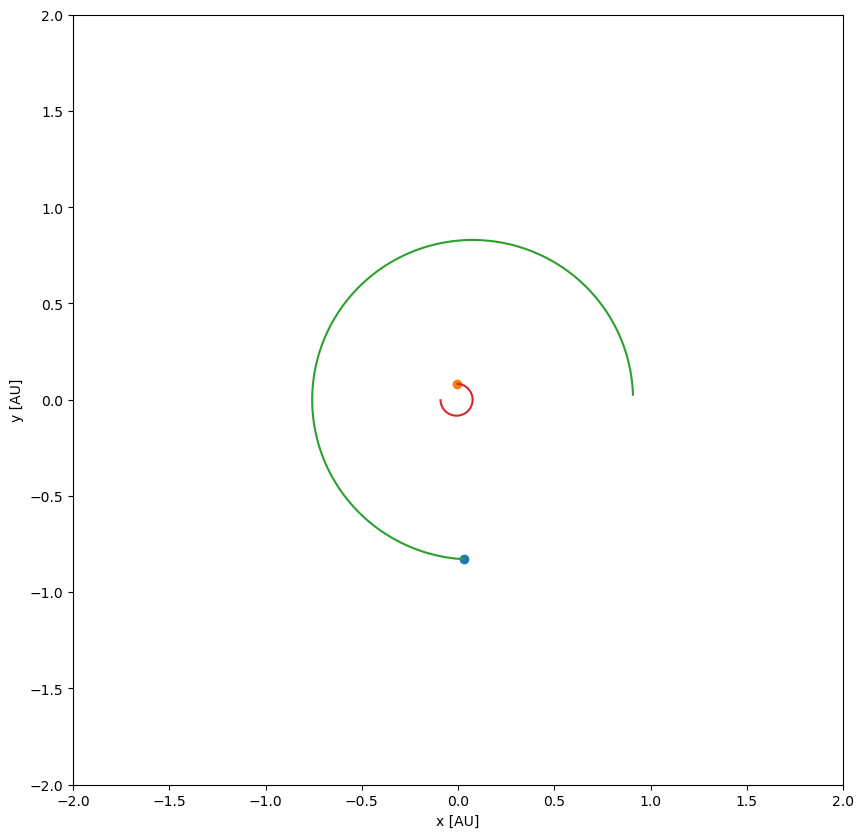

In [104]:
TwoBodyProblem("/home/robertoinfurna/dynamics_of_stellar_systems/nbody_sh1/output1.out")